In [45]:
import pathlib
import os
xx = sorted(list(pathlib.Path("dataset/").rglob("*.wav")))
cc = pathlib.Path("new_dataaset/" + "/".join(str(xx[0]).split("\\")[1:]))
new = pathlib.Path(os.path.join(cc.parent, cc.stem + "_" + str(11)+ cc.suffix))
xx[0].name

'549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav'

In [54]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

Fs, aud = wavfile.read('baby.wav')
# select left channel only
# aud = aud[:,0]
# trim the first 125 seconds
first = aud[:int(Fs*125)]
fig, ax = plt.subplots(1, 1, figsize = (200, 200))

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
# plt.show()
# fig.savefig("mm.png")
imageAxis

Error in callback <function _draw_all_if_interactive at 0x0000021D4330FC70> (for post_execute):


MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 20000x20000 with 1 Axes>

In [64]:
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

def audio2Spectrogram(audio_filename, image_shape = (224, 224), duration = 7.0, sample_rate = 22050):
#     image_shape = (224, 224) #(height, width) not (width, height)
    audio = Audio.from_file(audio_filename, sample_rate = sample_rate)
    spectrogram = Spectrogram.from_audio(audio)
    image = spectrogram.to_image(shape=image_shape,invert=True)
    return image
#     image.save(image_save_path)

spectro  =audio2Spectrogram("baby.wav", (200, 200))


# Resources

https://analyticsindiamag.com/hands-on-guide-to-librosa-for-handling-audio-files/

https://learnpython.com/blog/plot-waveform-in-python/

https://stackoverflow.com/questions/59924310/load-custom-data-from-folder-in-dir-pytorch


# Installing librries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import wave

import random
import librosa
import numpy as np
import soundfile as sf
# install pydub for using HighPassFilter and play
from pydub.playback import play
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter
# import simpleaudio as sa
import matplotlib.pyplot as plt
#from helper import _plot_signal_and_augmented_signal
from IPython.display import Audio
import librosa.display as dsp
# import mir_eval
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torchaudio
from torchsummary import summary 
import os

import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

from torch import nn
from torchvision import datasets
from torch.utils.tensorboard import SummaryWriter
# from torchvision.transforms import ToTensor

import torchvision
# from tflite_model_maker import audio_classifier
import tensorflow as ts
from tqdm.auto import tqdm

plt.rcParams["axes.labelsize"] = 'medium'
plt.rcParams["axes.titlecolor"] = 'red'
plt.rcParams["axes.titlesize"] = 'large'
#plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 18

# our modules

In [2]:
import audioModule
import networkArchitecture
import dataSetModule
import infantCryingModule

In [3]:
# import IPython.display.Audio class.
from IPython.display import Audio
def show(filename = 'baby.wav'):
    return display(Audio(filename=filename))

# Results 

The spectrogram is a visual representation of a spectrum of different frequencies for time.
Here we are plotting the spectrogram for linear frequencies and log frequencies. The use of
these two types of spectrogram completely relies on matters of interest. If you are more interested
in <b>higher</b> frequencies than lower ones, you should go with a <b>linear</b> frequencies plot.

In [4]:
ds = dataSetModule.buildDataSet(root = "dataset", targetSampleRate = 22050, duration = 7.0)

22050 154350 7.0
22050 151263 6.86


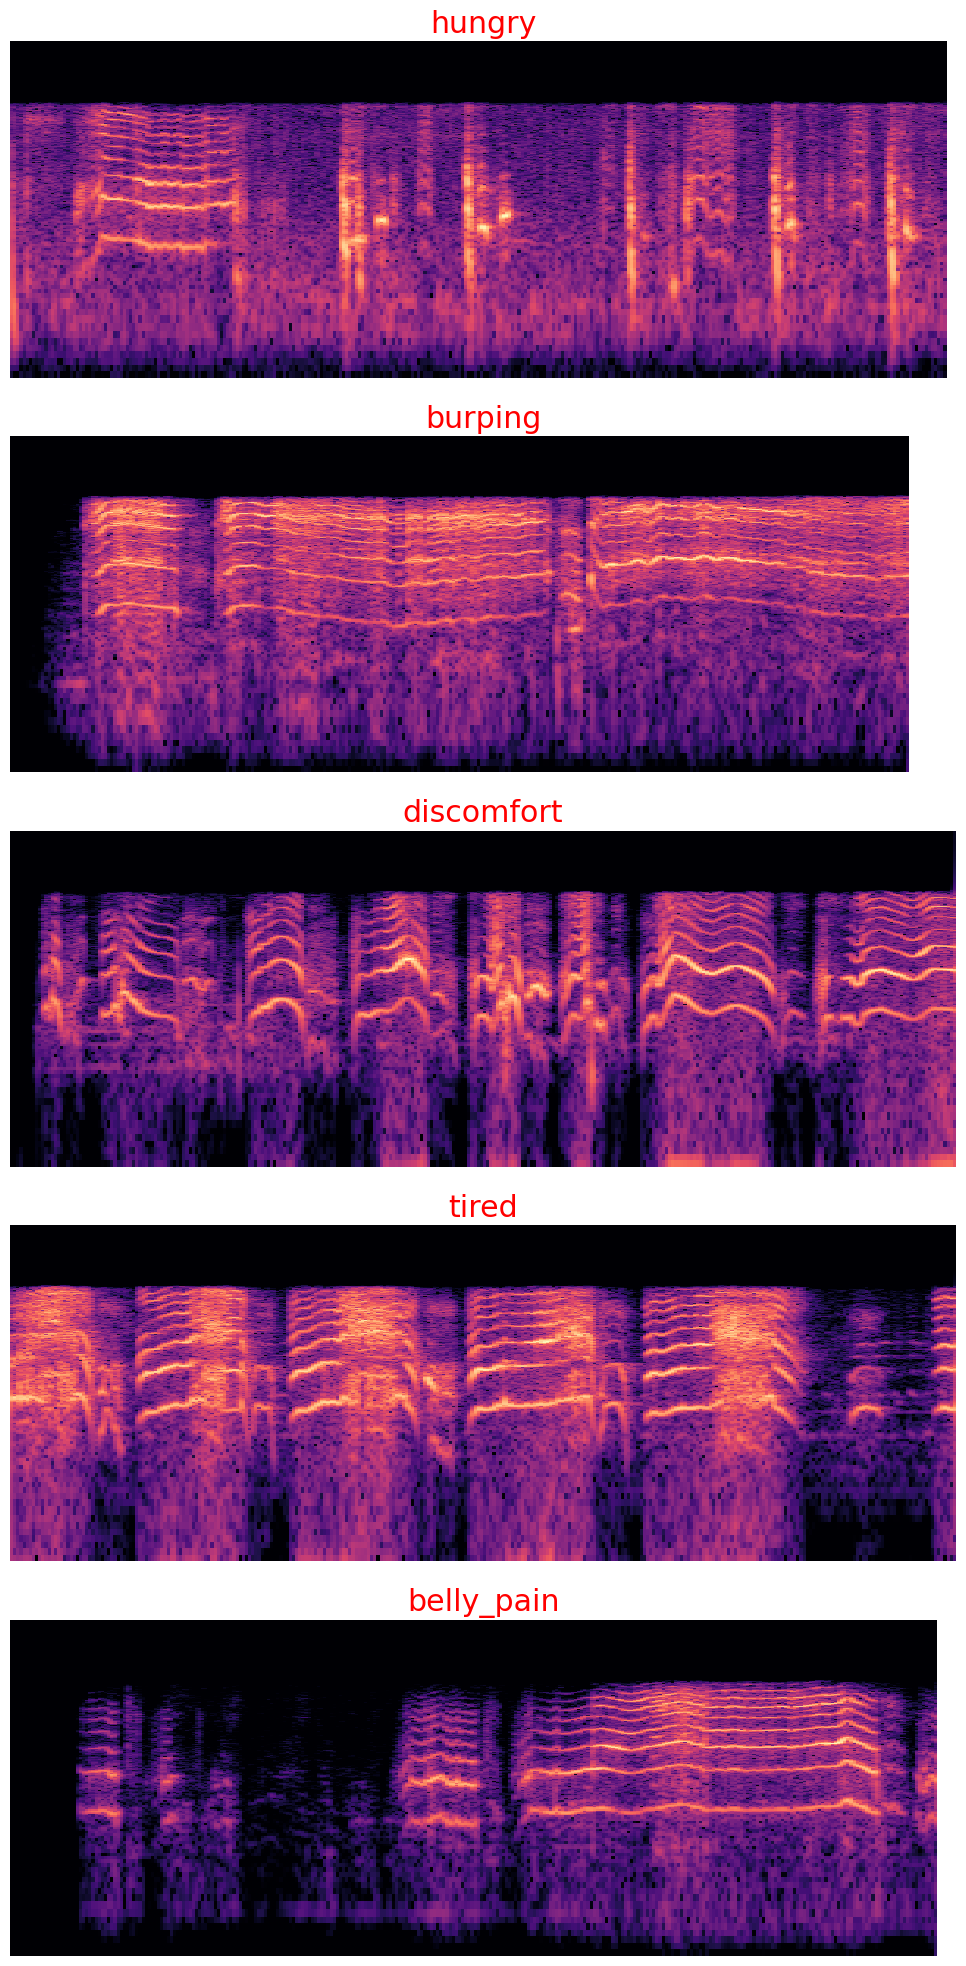

In [5]:
fig = ds.dataSetPlotSpect()
fig.savefig("Results\\"+"dataSetSpectrum" +'.png')

fig = ds.dataSetPlot()
fig.savefig("Results\\"+"dataSet" +'.png')

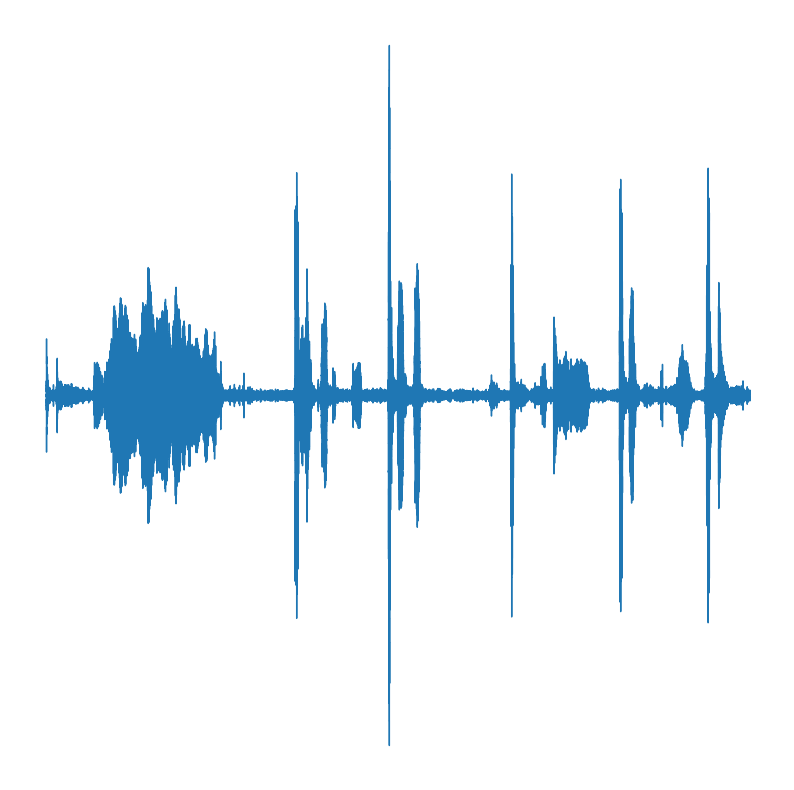

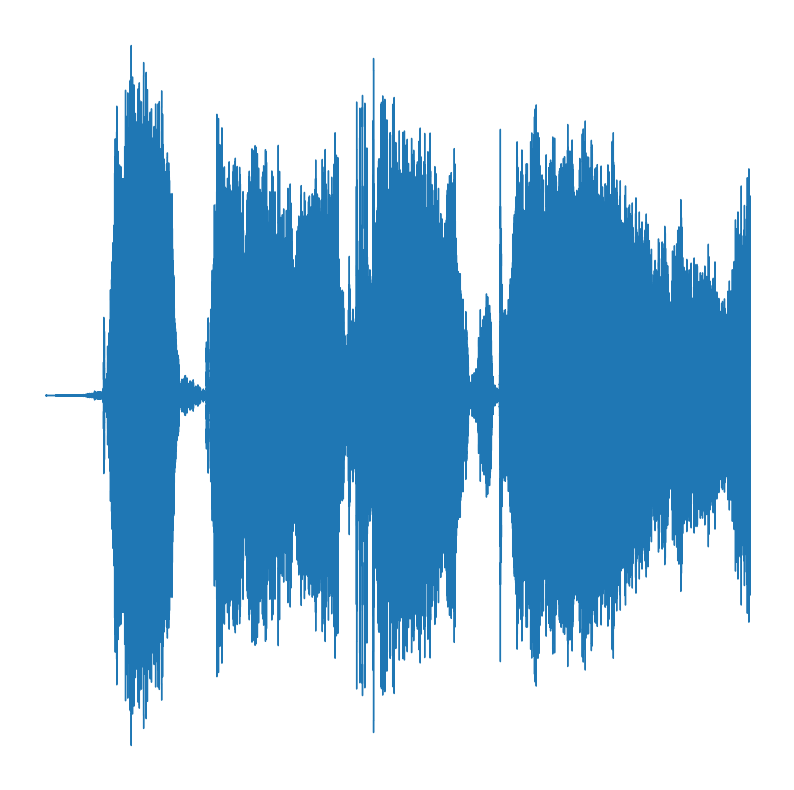

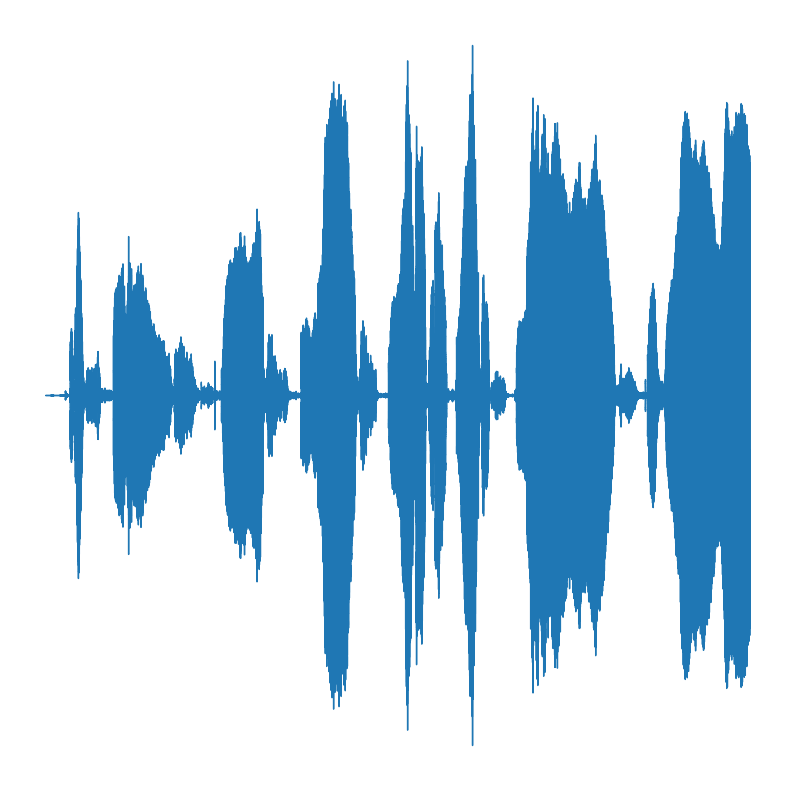

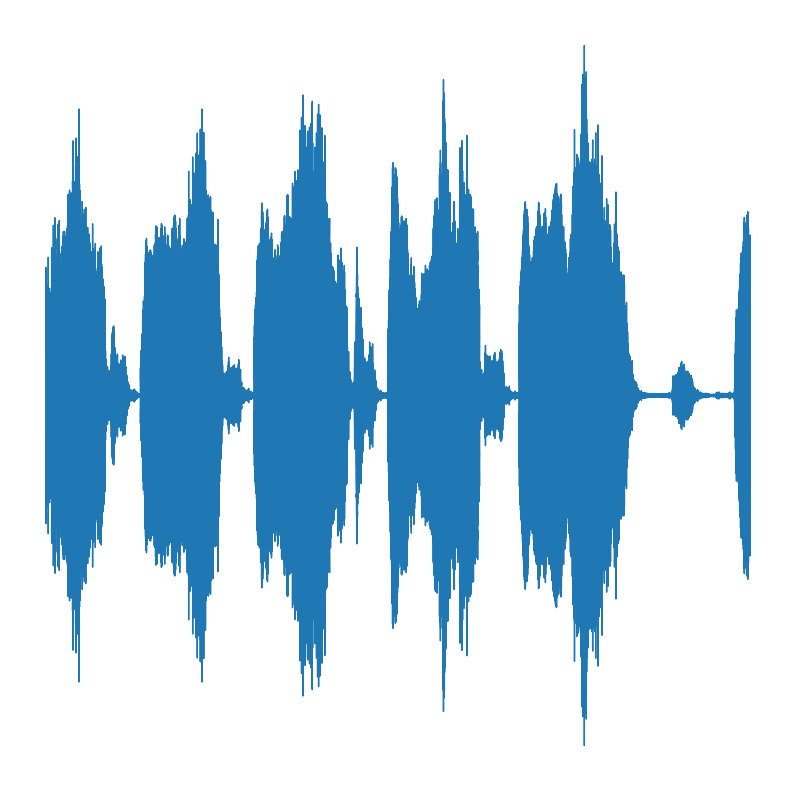

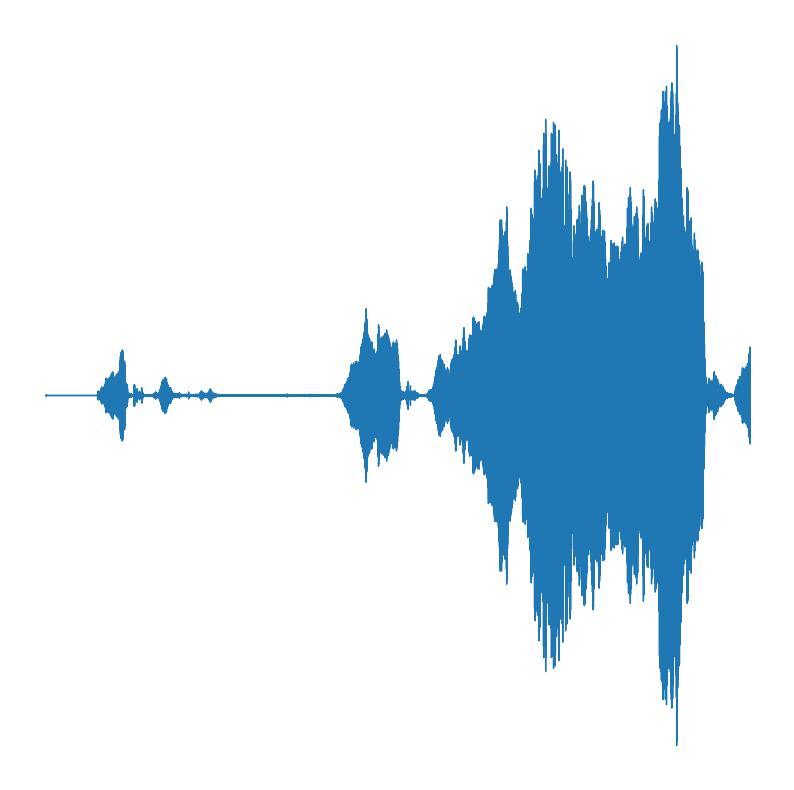

In [6]:
fig = ds.plotDsSamples()
# fig.savefig("Results\\"+"DsSamples" +'.png')

In [7]:
obj = audioModule.audioPreprocessing()
signal = obj.readAudio("baby.wav")

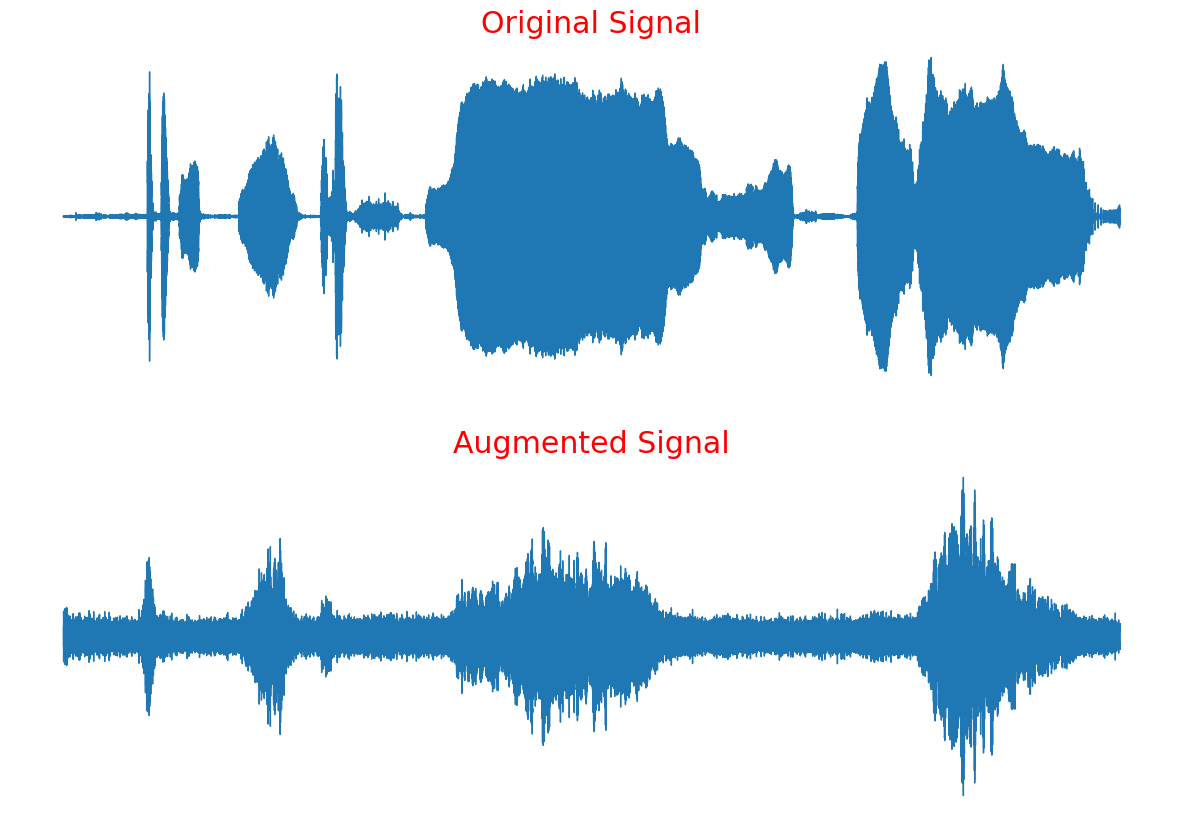

In [8]:
augmented_signal = obj.audioAugmentation(signal)
sf.write("augmented_audio.wav", augmented_signal, obj.sample_rate)
#obj.playAudio("augmented_audio.wav", isFile = True)
obj.plotBeforeAfter(signal, augmented_signal, obj.sample_rate)

In [9]:
print("Original Audio")
show("baby.wav")
print("Augmented Audio")
show("augmented_audio.wav")

Original Audio


Augmented Audio


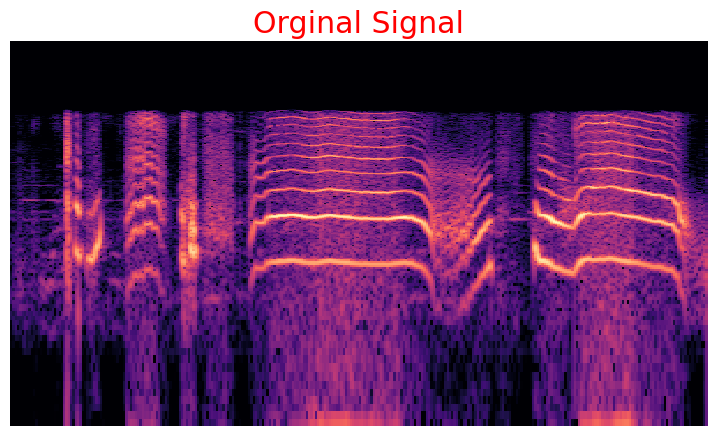

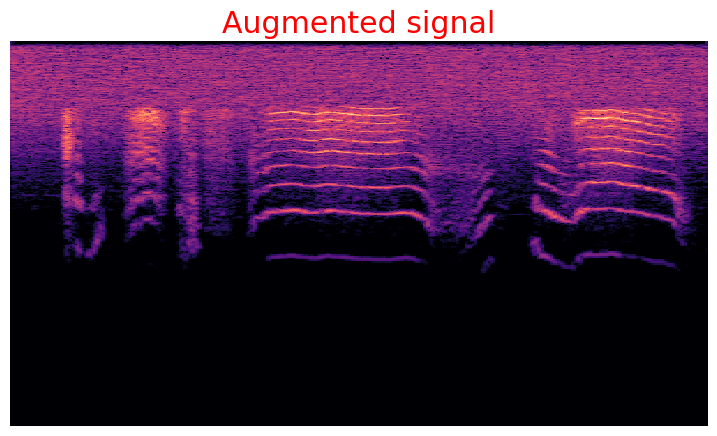

In [10]:
obj.plotSpectrum(signal, obj.sample_rate, 'log', "Orginal Signal")
plt.axis('off');
plt.savefig("Results/org_spec.png")
obj.plotSpectrum(augmented_signal, obj.sample_rate, 'log', "Augmented signal")
plt.axis('off');
plt.savefig("Results/aug_org_spec.png")


# Model Training

In [11]:
TRAIN_DATA_PATH = "dataset"

TRAIN_VAL_PATH = "valDataSet"

BATCH_SIZE = 64
EPOCHS = 10 # 
LEARNING_RATE = 0.0001 # 0.0003 #weight_decay #scheduler (for accuracy)
targetSampleRate = 22050
duration = 7.0
params = {'batch_size': BATCH_SIZE,
      'shuffle': True,
      'num_workers': 0}#2

In [12]:
audioDataSet = dataSetModule.buildDataSet(root = TRAIN_DATA_PATH, targetSampleRate = targetSampleRate, duration = duration)  
train_dataloader = torch.utils.data.DataLoader(audioDataSet, **params)
valDataSet = dataSetModule.buildDataSet(root = TRAIN_VAL_PATH, targetSampleRate = targetSampleRate, duration = duration)
vali_dataloader = torch.utils.data.DataLoader(valDataSet, **params)


x = [j.shape[1:] for j, _ in train_dataloader]
a, b, c = x[0]
shape = (a, b, c)

classifier = infantCryingModule.infantCryingClass(shape=shape, inpNum = 1, classesNum = audioDataSet.classesNum, params = params)
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(classifier.model.parameters(),
                             lr=LEARNING_RATE,eps=1e-5, weight_decay=1e-4)
classifier.info()

22050 154350 7.0
22050 151263 6.86
22050 154350 7.0
22050 151263 6.86
Using cpu


In [13]:
len(train_dataloader.dataset)

101

In [14]:
import torch.optim as optim
scheduler = optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)
# scheduler = optim.lr_scheduler.StepLR(optimiser, step_size=1, gamma=0.1)

In [15]:
# classifier = torch.load("ourFullModel.pth")

In [16]:
[trainAccHistory, trainLossHistory, valAccHistory, valLossHistory, lrHistory] = classifier.traniValidate(train_dataloader, vali_dataloader, loss_fn, optimiser, 200, scheduler)

training:   0%|          | 0/400 [00:00<?, ?it/s]


 ________________________________________________________________________________________________________________________
Epoch-1 lr: 0.0	 train acc = 14.851479530334473 %	 train loss = 1.69619 
valid acc: 31.25 valid loss: 1.508
----------------------------------------------------------------------------------------------------
Epoch-2 lr: 0.0	 train acc = 23.762380599975586 %	 train loss = 1.612336 
valid acc: 18.75 valid loss: 1.66
----------------------------------------------------------------------------------------------------
Epoch-3 lr: 0.0	 train acc = 21.782180786132812 %	 train loss = 1.637276 
valid acc: 25.0 valid loss: 1.597
----------------------------------------------------------------------------------------------------
Epoch-4 lr: 0.0	 train acc = 29.702970504760742 %	 train loss = 1.56083 
valid acc: 18.75 valid loss: 1.667
----------------------------------------------------------------------------------------------------
Epoch-5 lr: 0.0	 train acc = 26.732669830

Epoch-40 lr: 0.0	 train acc = 25.74258041381836 %	 train loss = 1.636375 
valid acc: 18.75 valid loss: 1.706
----------------------------------------------------------------------------------------------------
Epoch-41 lr: 0.0	 train acc = 24.752479553222656 %	 train loss = 1.639455 
valid acc: 18.75 valid loss: 1.708
----------------------------------------------------------------------------------------------------
Epoch-42 lr: 0.0	 train acc = 24.752479553222656 %	 train loss = 1.6462 
valid acc: 18.75 valid loss: 1.735
----------------------------------------------------------------------------------------------------
Epoch-43 lr: 0.0	 train acc = 27.72277069091797 %	 train loss = 1.628769 
valid acc: 18.75 valid loss: 1.712
----------------------------------------------------------------------------------------------------
Epoch-44 lr: 0.0	 train acc = 29.702970504760742 %	 train loss = 1.619992 
valid acc: 25.0 valid loss: 1.648
---------------------------------------------------

Epoch-80 lr: 0.0	 train acc = 32.67327117919922 %	 train loss = 1.585089 
valid acc: 18.75 valid loss: 1.707
----------------------------------------------------------------------------------------------------
Epoch-81 lr: 0.0	 train acc = 27.72277069091797 %	 train loss = 1.614418 
valid acc: 25.0 valid loss: 1.678
----------------------------------------------------------------------------------------------------
Epoch-82 lr: 0.0	 train acc = 33.663360595703125 %	 train loss = 1.571934 
valid acc: 25.0 valid loss: 1.675
----------------------------------------------------------------------------------------------------
Epoch-83 lr: 0.0	 train acc = 33.663360595703125 %	 train loss = 1.585813 
valid acc: 18.75 valid loss: 1.684
----------------------------------------------------------------------------------------------------
Epoch-84 lr: 0.0	 train acc = 33.663360595703125 %	 train loss = 1.586679 
valid acc: 25.0 valid loss: 1.69
----------------------------------------------------

Epoch-119 lr: 0.0	 train acc = 30.693069458007812 %	 train loss = 1.606764 
valid acc: 18.75 valid loss: 1.723
----------------------------------------------------------------------------------------------------
Epoch-120 lr: 0.0	 train acc = 26.732669830322266 %	 train loss = 1.643155 
valid acc: 18.75 valid loss: 1.722
----------------------------------------------------------------------------------------------------
Epoch-121 lr: 0.0	 train acc = 29.702970504760742 %	 train loss = 1.620541 
valid acc: 18.75 valid loss: 1.691
----------------------------------------------------------------------------------------------------
Epoch-122 lr: 0.0	 train acc = 31.683170318603516 %	 train loss = 1.597951 
valid acc: 25.0 valid loss: 1.648
----------------------------------------------------------------------------------------------------
Epoch-123 lr: 0.0	 train acc = 29.702970504760742 %	 train loss = 1.612018 
valid acc: 18.75 valid loss: 1.704
------------------------------------------

Epoch-158 lr: 0.0	 train acc = 31.683170318603516 %	 train loss = 1.581563 
valid acc: 18.75 valid loss: 1.731
----------------------------------------------------------------------------------------------------
Epoch-159 lr: 0.0	 train acc = 33.663360595703125 %	 train loss = 1.566156 
valid acc: 18.75 valid loss: 1.714
----------------------------------------------------------------------------------------------------
Epoch-160 lr: 0.0	 train acc = 31.683170318603516 %	 train loss = 1.578882 
valid acc: 25.0 valid loss: 1.684
----------------------------------------------------------------------------------------------------
Epoch-161 lr: 0.0	 train acc = 30.693069458007812 %	 train loss = 1.620841 
valid acc: 12.5 valid loss: 1.751
----------------------------------------------------------------------------------------------------
Epoch-162 lr: 0.0	 train acc = 33.663360595703125 %	 train loss = 1.579645 
valid acc: 18.75 valid loss: 1.721
-------------------------------------------

Epoch-197 lr: 0.0	 train acc = 39.60395812988281 %	 train loss = 1.542664 
valid acc: 31.25 valid loss: 1.628
----------------------------------------------------------------------------------------------------
Epoch-198 lr: 0.0	 train acc = 36.63365936279297 %	 train loss = 1.548638 
valid acc: 31.25 valid loss: 1.568
----------------------------------------------------------------------------------------------------
Epoch-199 lr: 0.0	 train acc = 34.65346145629883 %	 train loss = 1.559719 
valid acc: 31.25 valid loss: 1.592
----------------------------------------------------------------------------------------------------
Epoch-200 lr: 0.0	 train acc = 35.643558502197266 %	 train loss = 1.545189 
valid acc: 31.25 valid loss: 1.597
----------------------------------------------------------------------------------------------------

 ________________________________________________________________________________________________________________________
Finished training with
		 Accura

In [17]:
valAccHistory, valLossHistory

([tensor(0.3125),
  tensor(0.1875),
  tensor(0.2500),
  tensor(0.1875),
  tensor(0.1250),
  tensor(0.0625),
  tensor(0.1250),
  tensor(0.1875),
  tensor(0.1250),
  tensor(0.1250),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1250),
  tensor(0.1875),
  tensor(0.1250),
  tensor(0.1250),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.2500),
  tensor(0.1875),
  tensor(0.2500),
  tensor(0.1250),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1250),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1250),
  tensor(0.2500),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.2500),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.2500),
  tensor(0.1250),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0.1875),
  tensor(0

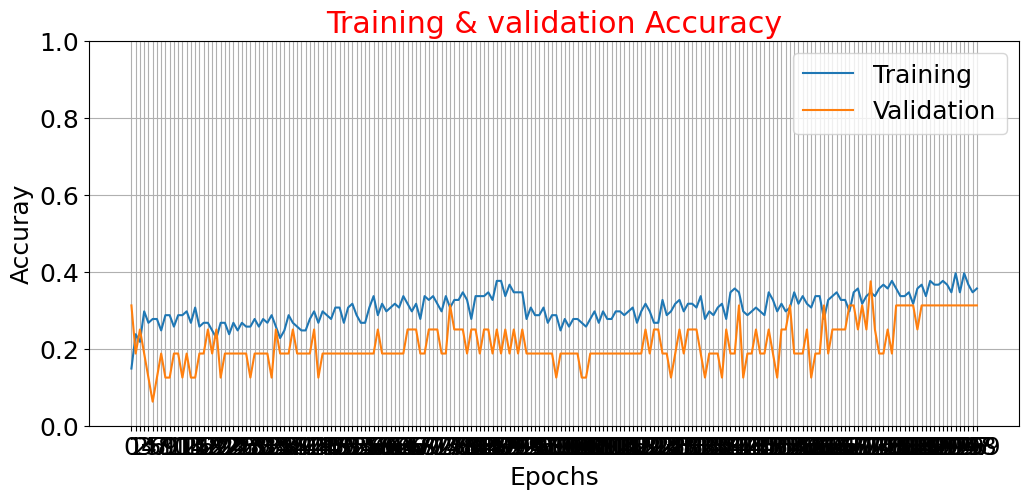

In [18]:
infantCryingModule.plotGraphs(["Epochs", "Accuray"],
           "Training & validation Accuracy",
           ["Training", "Validation"],
            [[0], [0,1]],
            trainAccHistory, valAccHistory);

In [19]:
classifier.save("ourModel.pth")
torch.save(classifier.model, "ourFullModel.pth")

Trained feed forward net saved at ourModel.pth


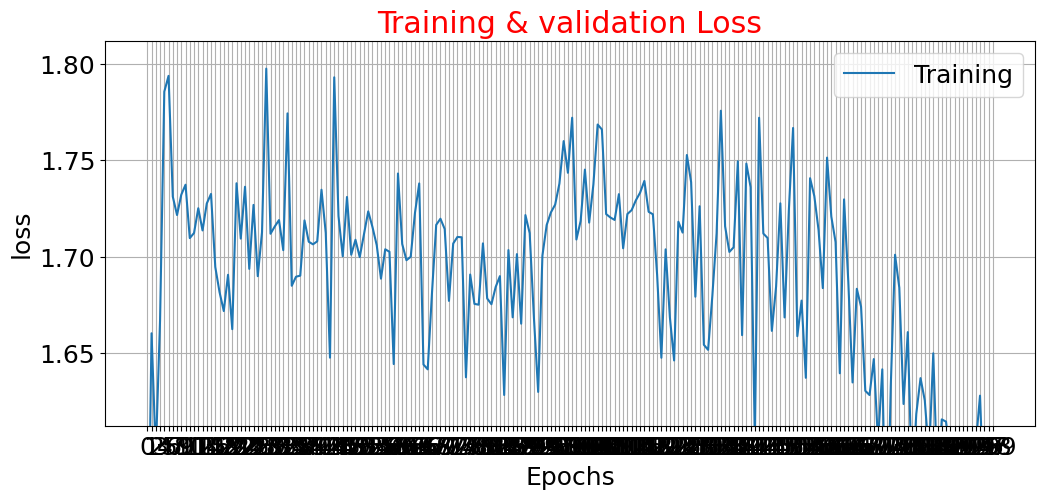

In [20]:
infantCryingModule.plotGraphs(["Epochs", "loss"],
           "Training & validation Loss",
           ["Training", "Validation"],
          trainLossHistory, valLossHistory);

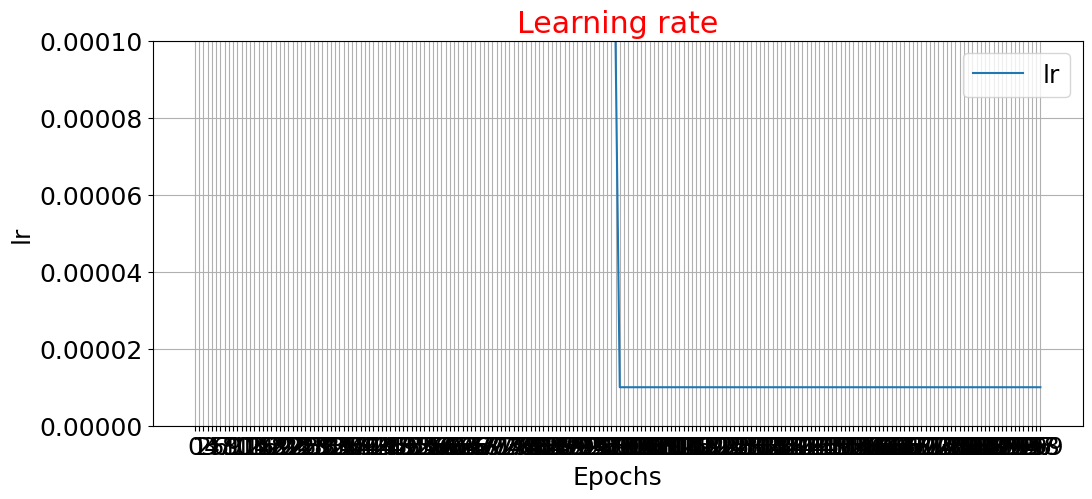

In [21]:
infantCryingModule.plotGraphs(["Epochs", "lr"],
           "Learning rate", ["lr"],[[0], [0, LEARNING_RATE]],
          lrHistory);

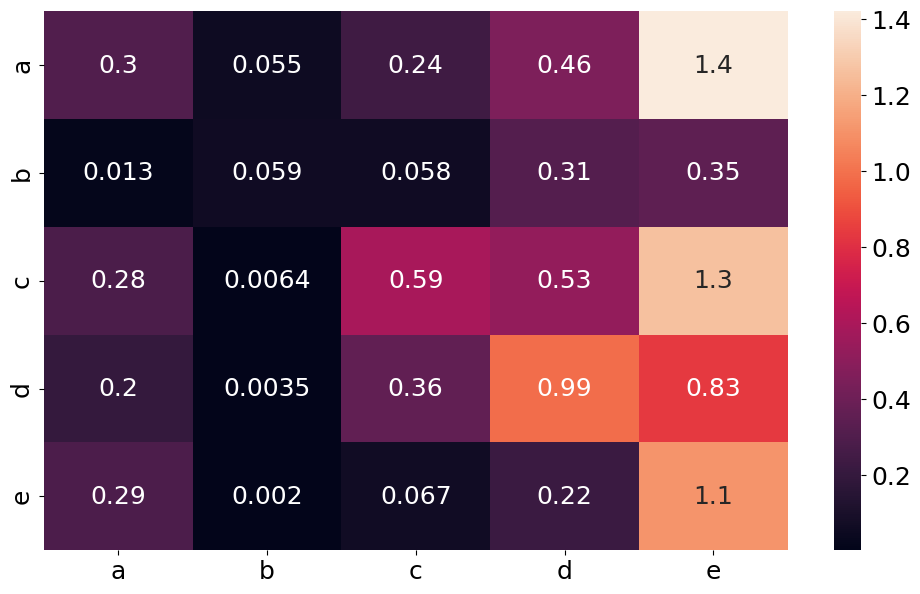

In [22]:
fig = classifier.confusionMatrix()
fig.savefig("Results\\"+"cm" +'.png')

# Validation

TRAIN_VAL_PATH = "valDataSet"

valDataSet = dataSetModule.buildDataSet(root = TRAIN_VAL_PATH,
                                        targetSampleRate = targetSampleRate,
                                        duration = duration)

vali_dataloader = torch.utils.data.DataLoader(valDataSet, **params)

# Run inference on trained model with the validation set
valiAccHistory = classifier.inference(vali_dataloader)

# Inference
We would then do inference on unseen data, perhaps by keeping aside a test dataset from the original data.
We run an inference loop taking care to disable the gradient updates. The forward pass is executed with the model to get predictions, but we do not need to backpropagate or run the optimizer.

# last step (also for RP)

In [23]:
import babyStateModule
ob = babyStateModule.BabayState(modelName = "ourModel.pth",
                Full = False,
                class_mapping = ['hungry', 'discomfort', 'tired', 'belly_pain', 'burping'])
_, votedClass = ob.predict("recordedData.wav")
print(_*100, votedClass)

TypeError: infantCryingClass.__init__() missing 1 required positional argument: 'shape'

------------------
------------------
------------------

In [ ]:
# # Example of target with class indices
loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()

# Example of target with class probabilities
input = torch.randn(5, requires_grad=True)
target = torch.randn(1,5).softmax(dim=1)
input = torch.unsqueeze(input, axis=0)


print(input.shape, target.shape)
print(input.shape)

print(input)

print(target)
output = loss(input, target)
output.backward()
print(output.item())

In [ ]:
zz = torch.Tensor([[12,34,5],[22,3,5]])
zz.shape[1]
# Example of target with class indices
loss = nn.CrossEntropyLoss()
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
print(input.shape)
output = loss(input, target)
output.backward()

m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)
output

In [ ]:
# import IPython.display.Audio class.
from IPython.display import Audio
def show(filename = 'baby.wav'):
    return display(Audio(filename=filename))

In [ ]:
idx = 2
cc = torch.Tensor([0]*5)
cc[idx]=1
cc

In [ ]:
a = torch.Tensor([[0,1,2,3,400],
                  [1,200,3,4,55]])
b = torch.Tensor([[0,3,4,3,4],
                  [3,800,6,7,55]])
sum(sum(a == b))

In [ ]:
x = torch.Tensor([1,2,3,4])
sum(x)

In [ ]:
torch.argmax(a, dim = 0)

In [ ]:
sum(torch.argmax(a, dim = 0) == torch.argmax(b, dim = 0))

In [ ]:
cc = torch.Tensor([0.88])

In [ ]:
cc

In [ ]:
cc.item()

In [ ]:
import infantCryingModule
infantCryingModule.plotGraphs(["Epochs", "Accuray"],
           "Training & validation Accuracy",
           ["Training", "Validation"],
            [[0], [0,1]],
            range(10), range(10));

In [ ]:
from torch import nn
nn.flatten()
nn.linear()
nn.softmax()
np.array()